# <center> ÁNALISIS EXPLORATORIO DE LOS DATOS

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from sklearn.feature_selection import SelectKBest, f_regression

# Configuraciones generales
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('../data/raw/AmesHousing.csv', sep=',')

In [2]:
# ----------------------
# 1. Información básica
# ----------------------

print("----- INFO GENERAL DEL DATASET -----")
print(df.info())            # Tipos, nulos, memoria

----- INFO GENERAL DEL DATASET -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 n

In [3]:
print("\n----- PRIMERAS FILAS -----")
df.head()         # Primeras filas


----- PRIMERAS FILAS -----


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
print("\n----- DESCRIPCIÓN ESTADÍSTICA -----")
df.describe(include='all')  # Estadísticas (numéricas y categóricas)


----- DESCRIPCIÓN ESTADÍSTICA -----


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000



----- VALORES NULOS -----
Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

% NULOS POR COLUMNA
Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64


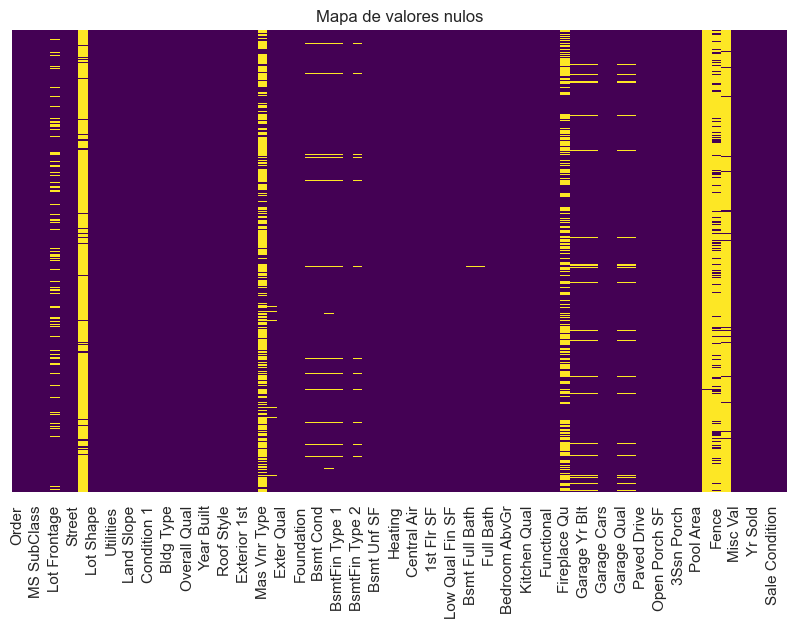

In [5]:
# ---------------------------
# 2. Análisis valores nulos
# ---------------------------

print("\n----- VALORES NULOS -----")
print(df.isnull().sum())
print("\n% NULOS POR COLUMNA")
print(df.isnull().mean()*100)

# Visualizar nulos (heatmap)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores nulos")
plt.show()

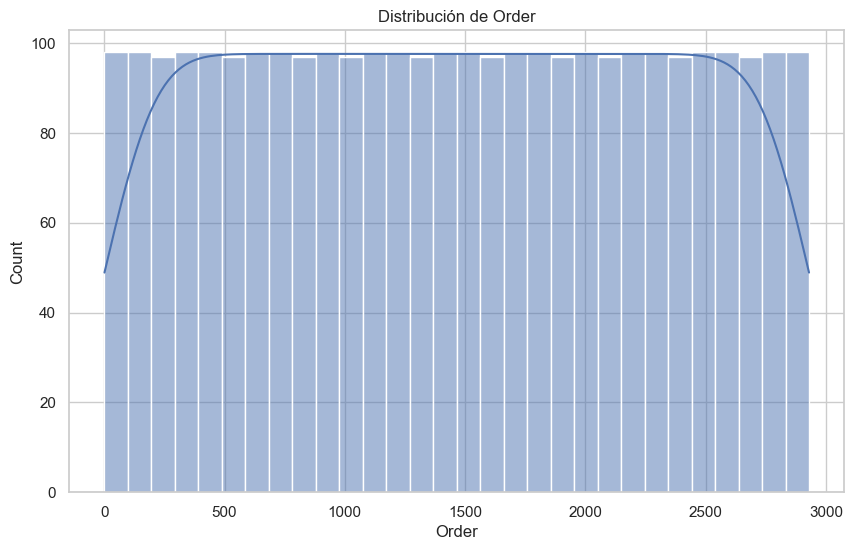

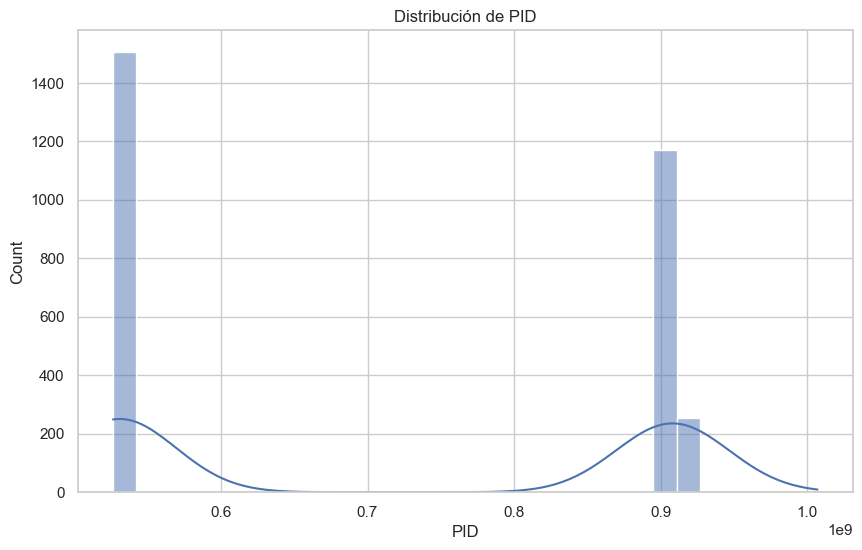

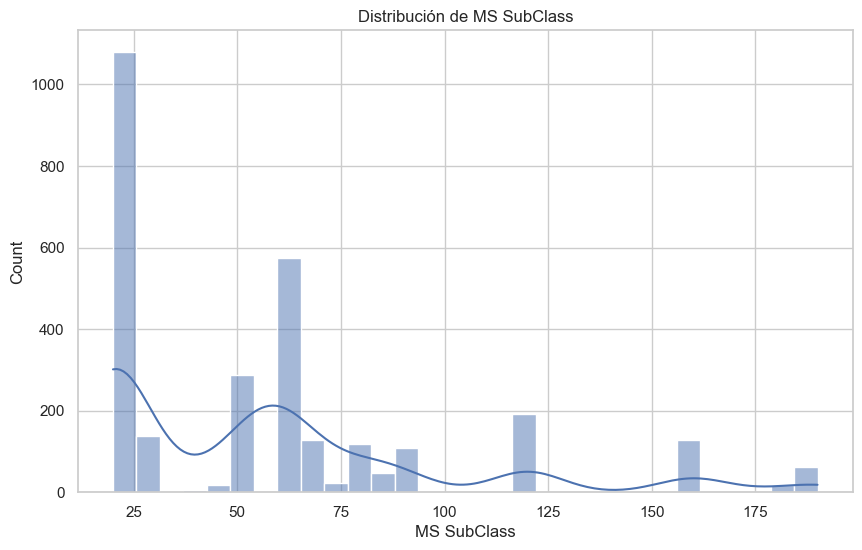

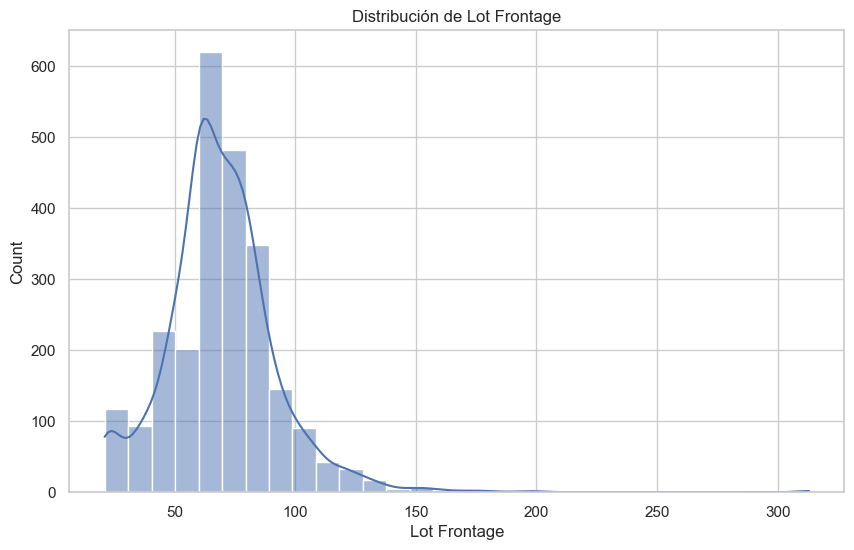

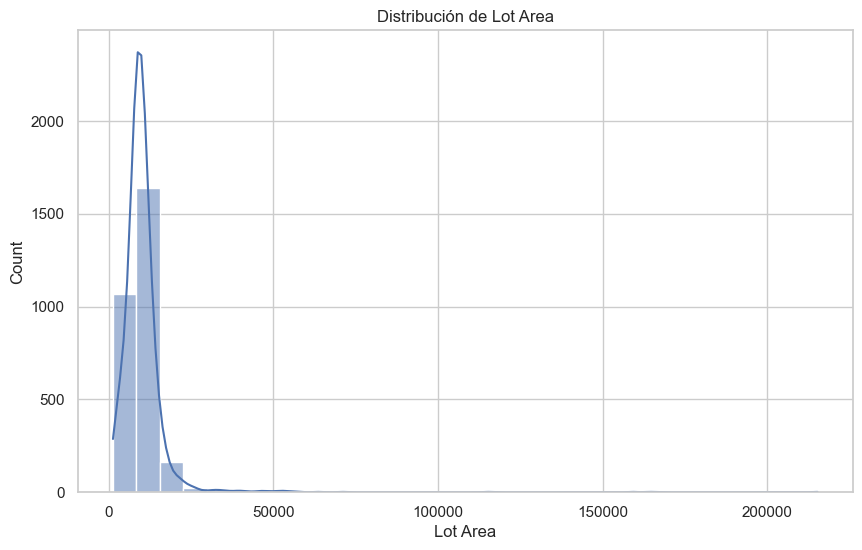

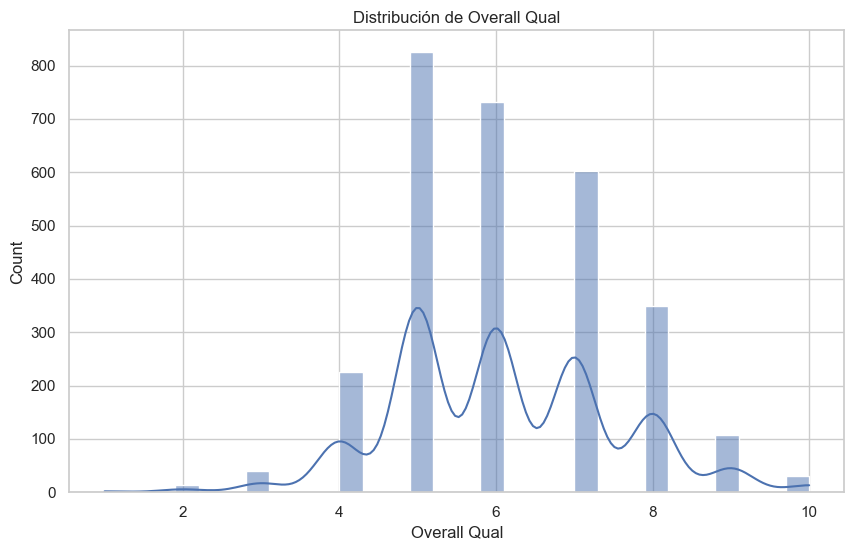

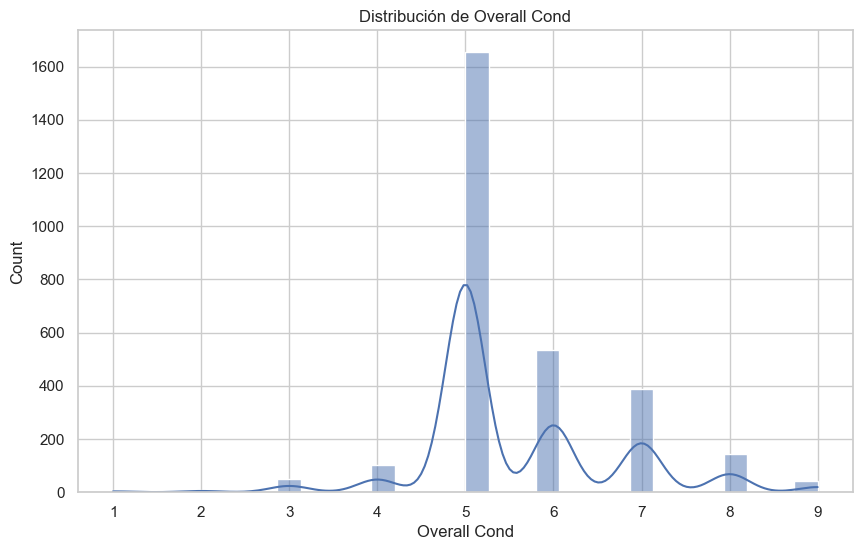

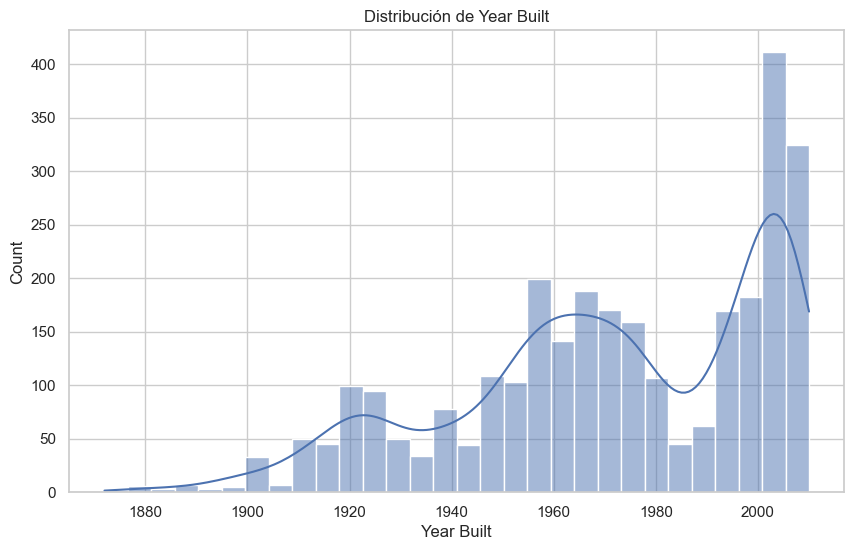

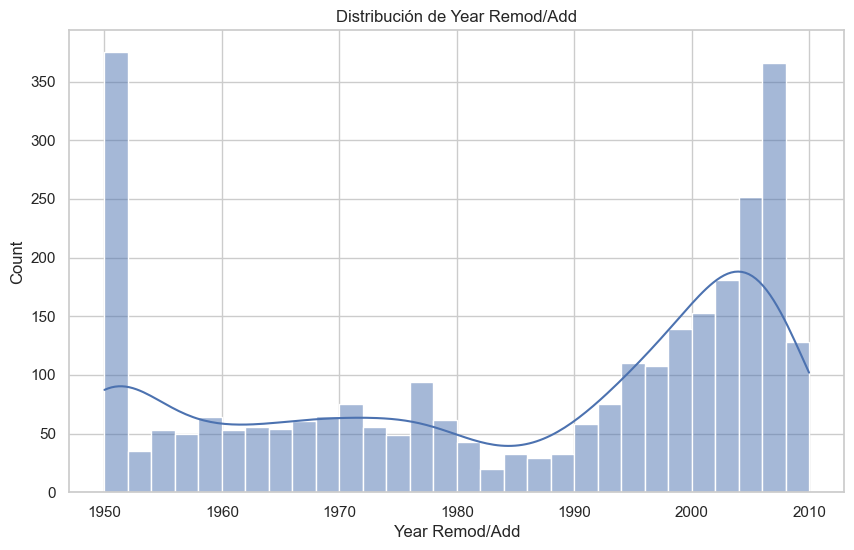

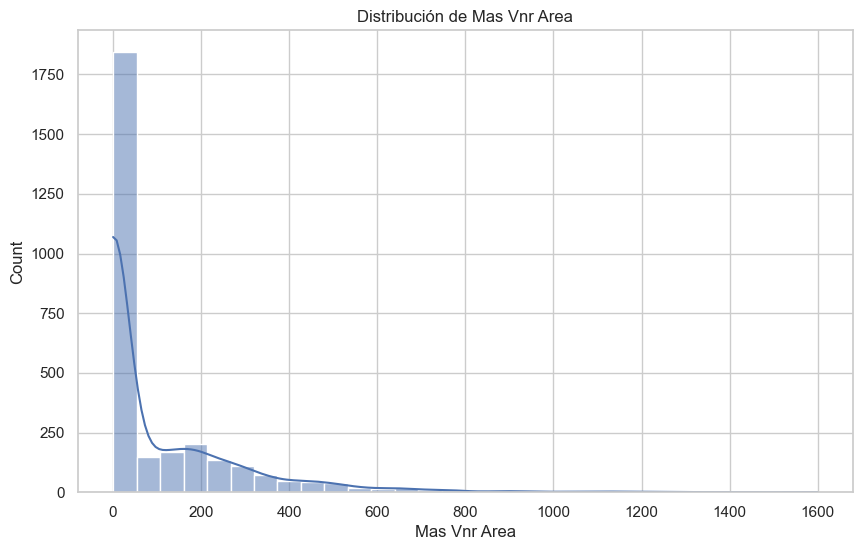

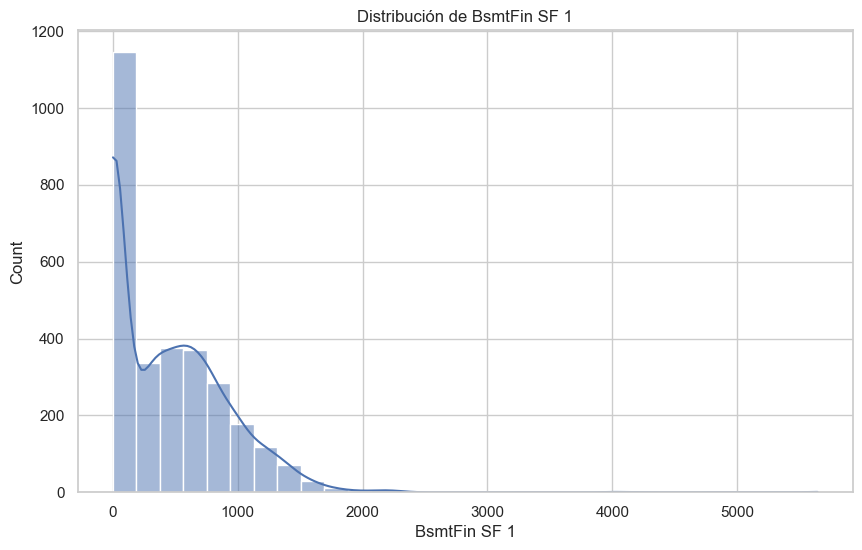

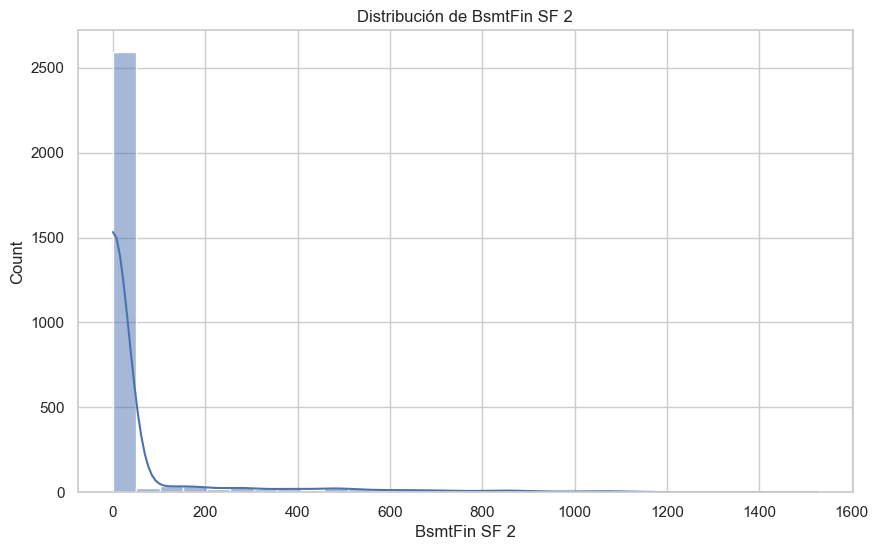

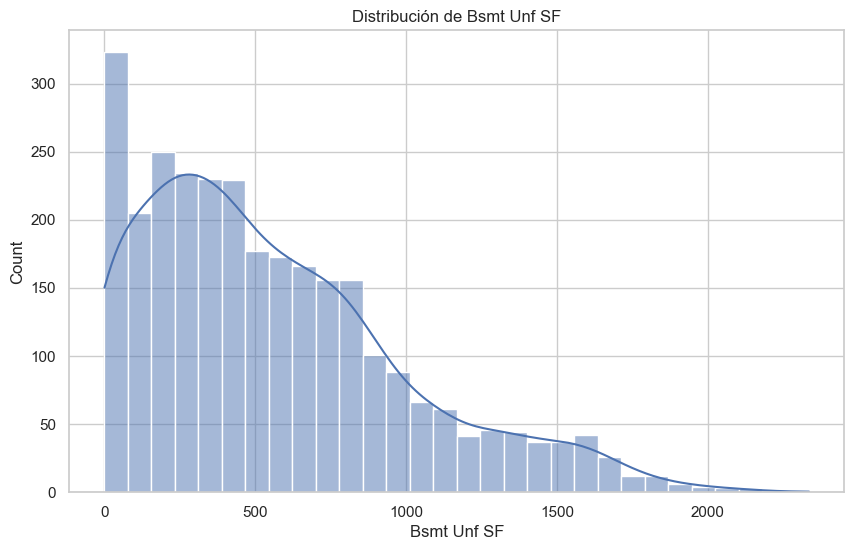

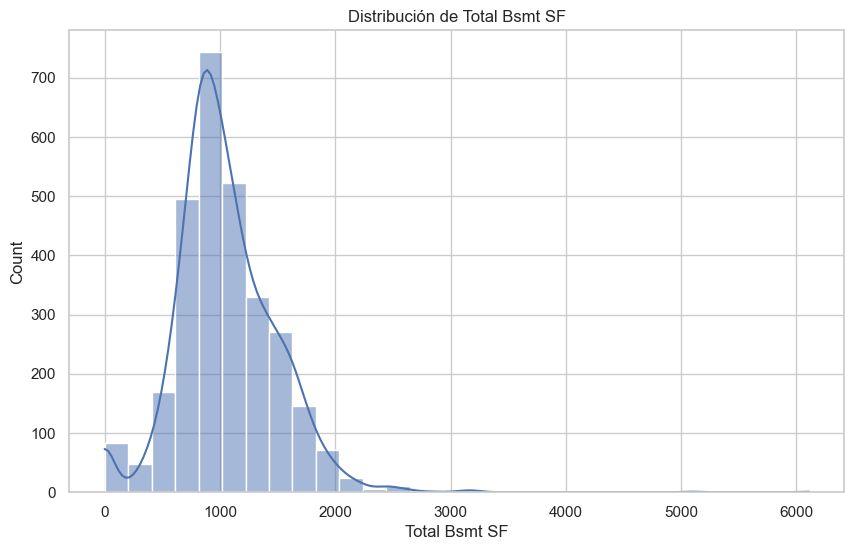

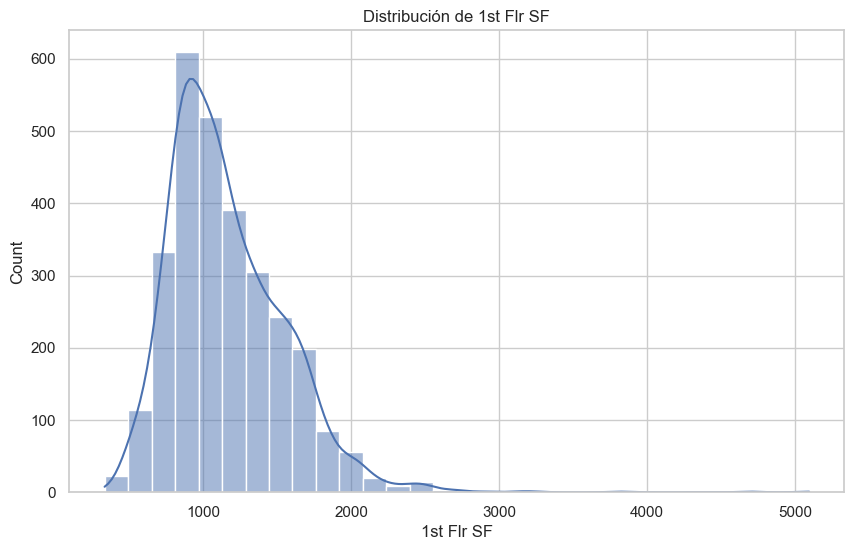

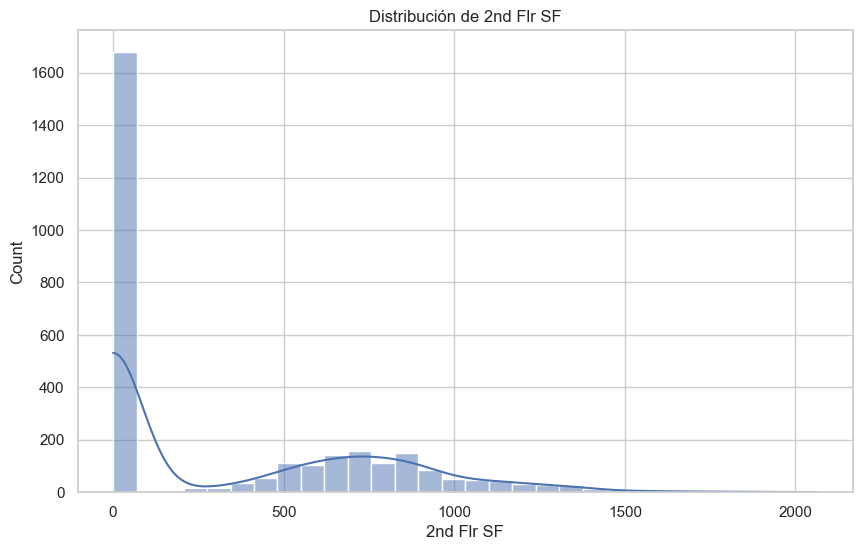

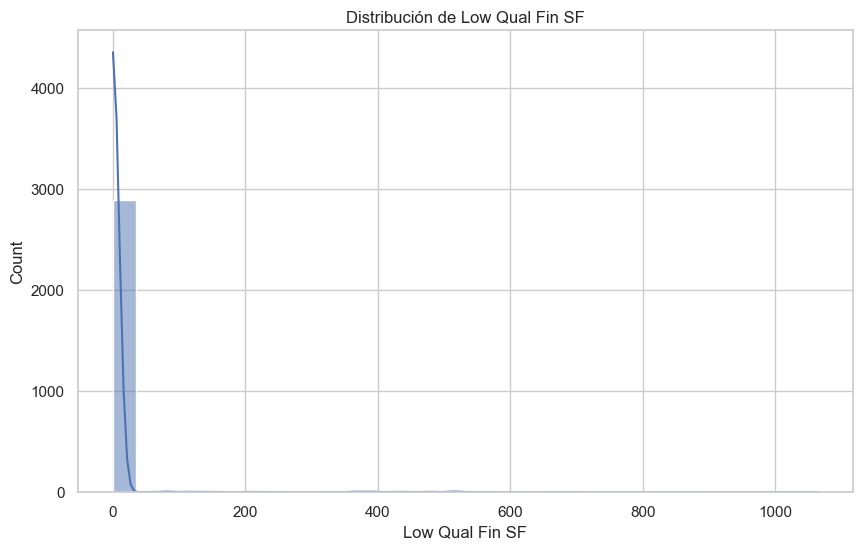

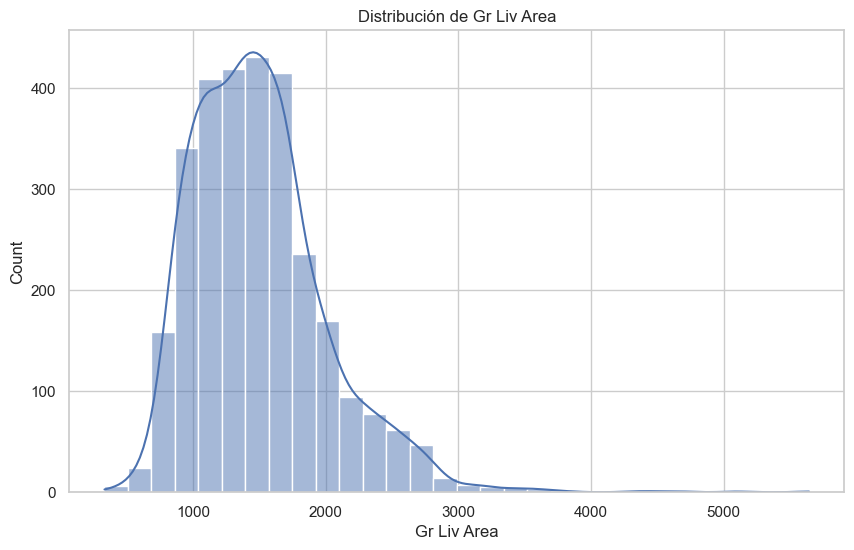

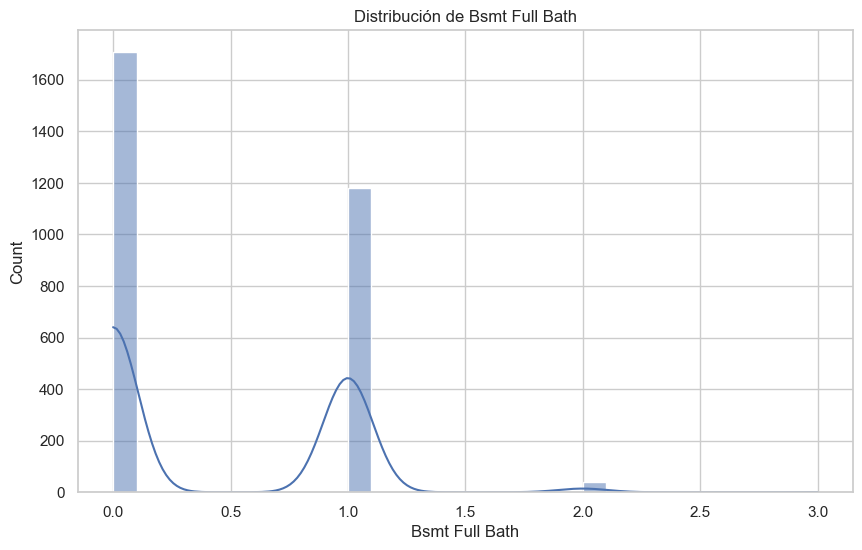

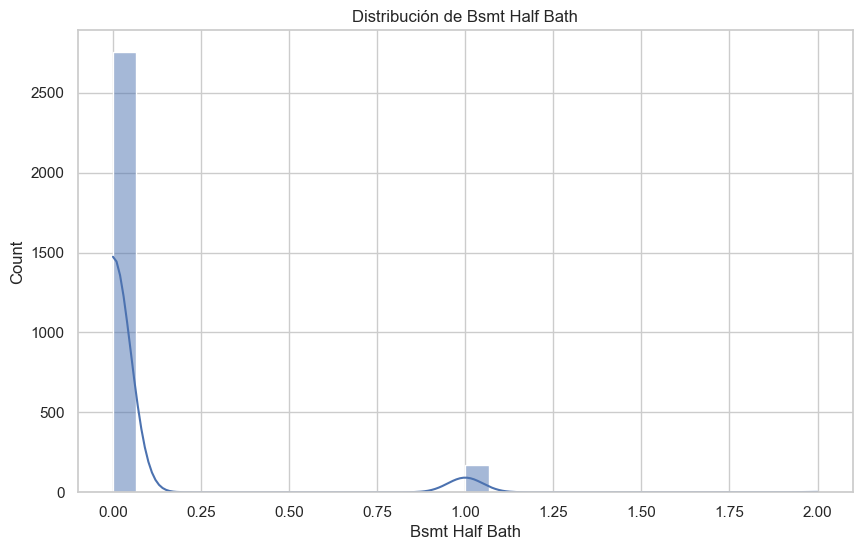

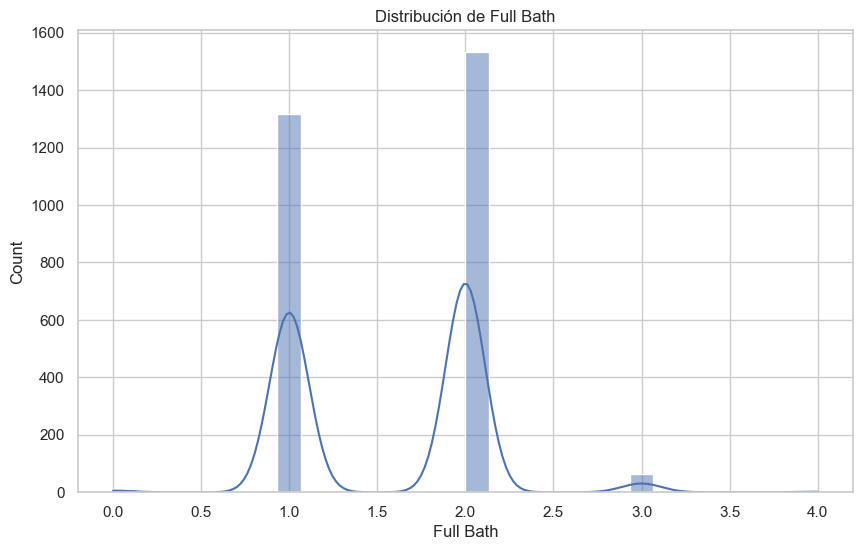

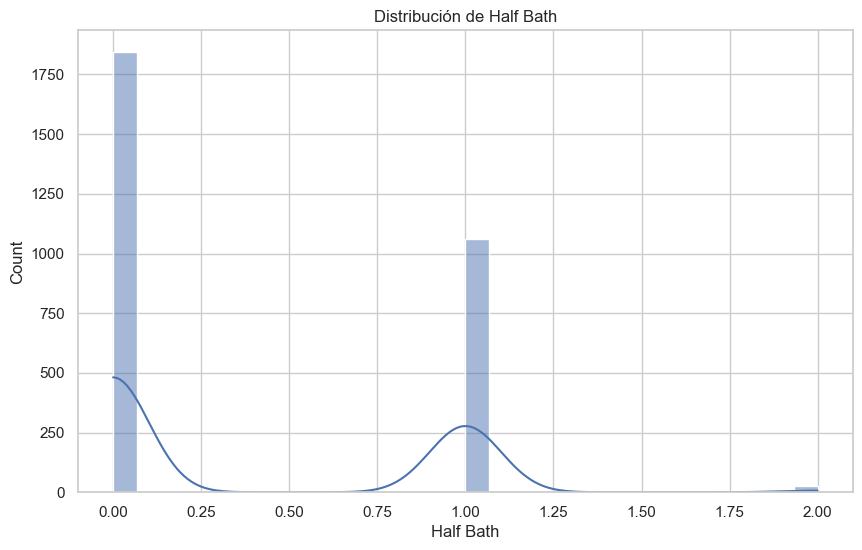

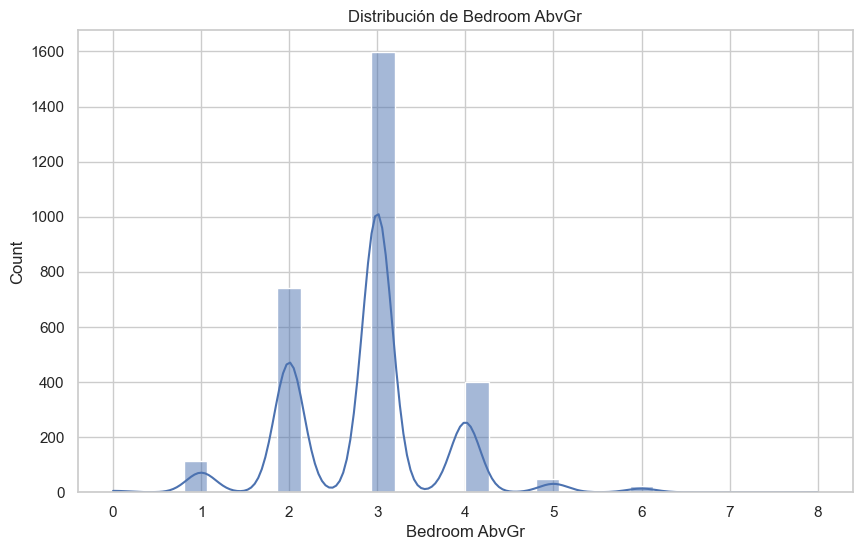

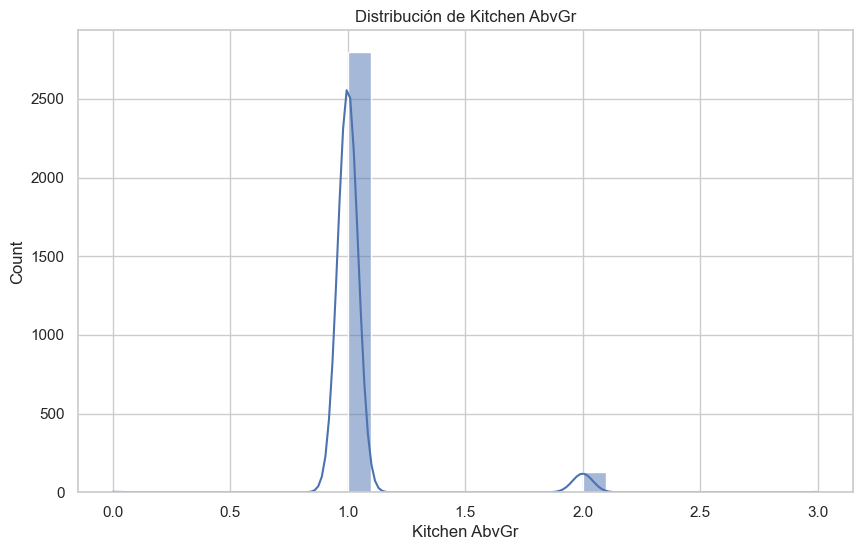

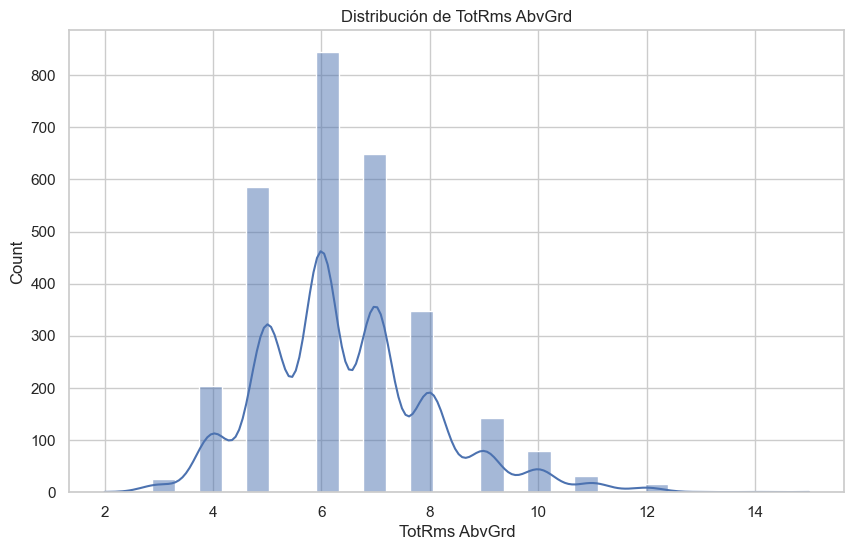

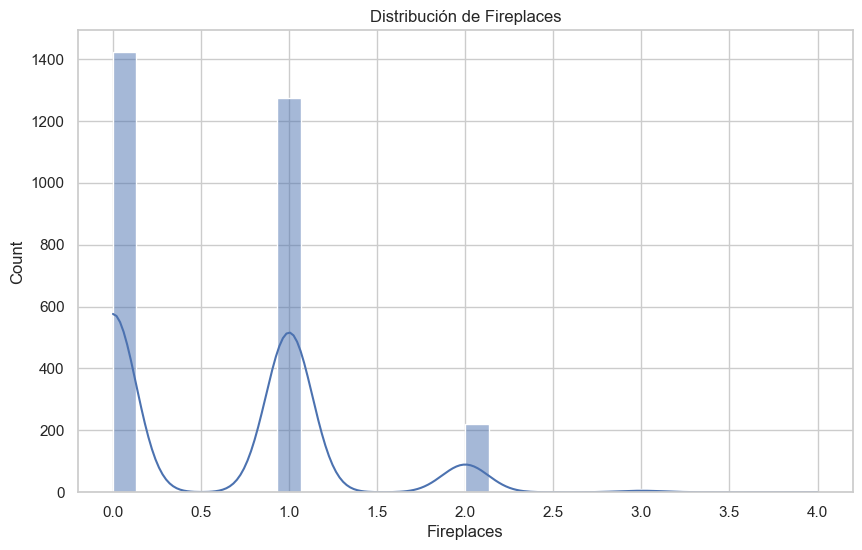

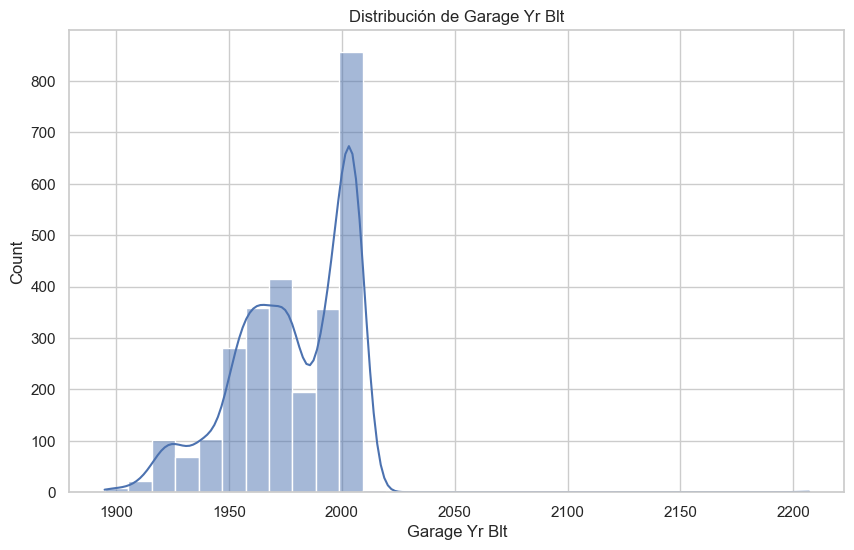

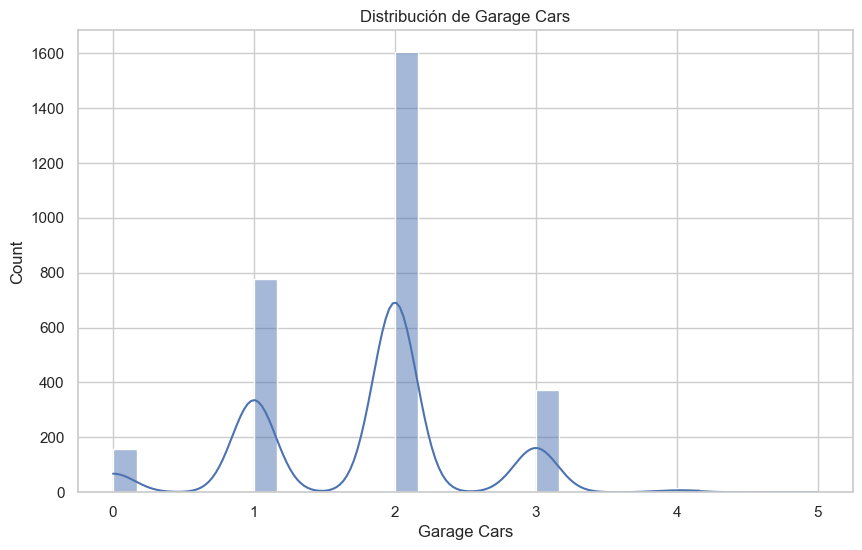

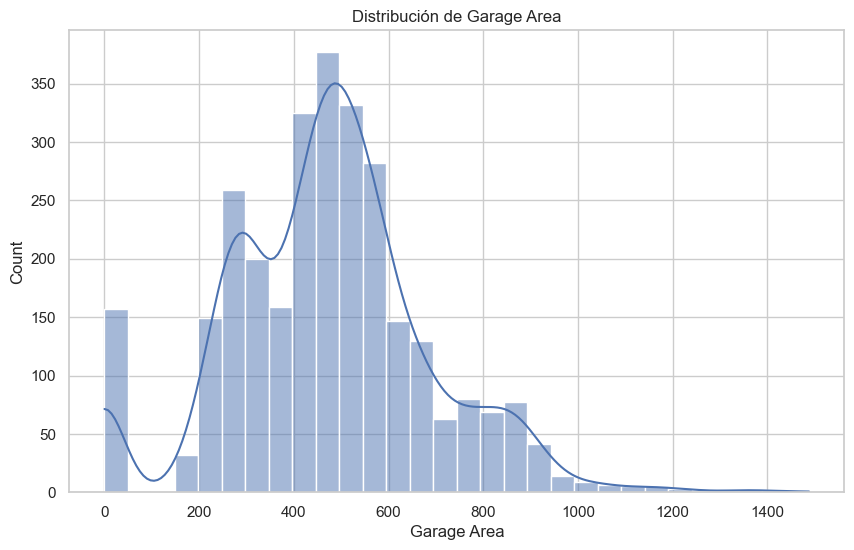

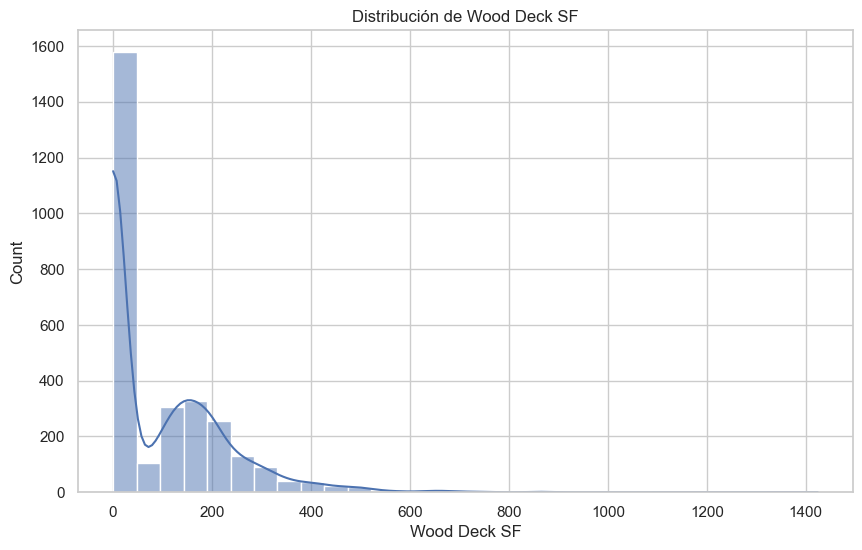

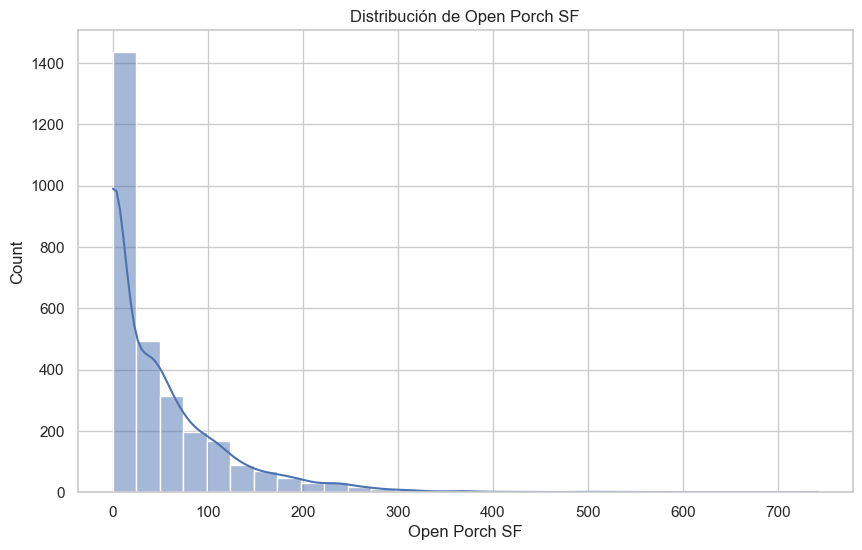

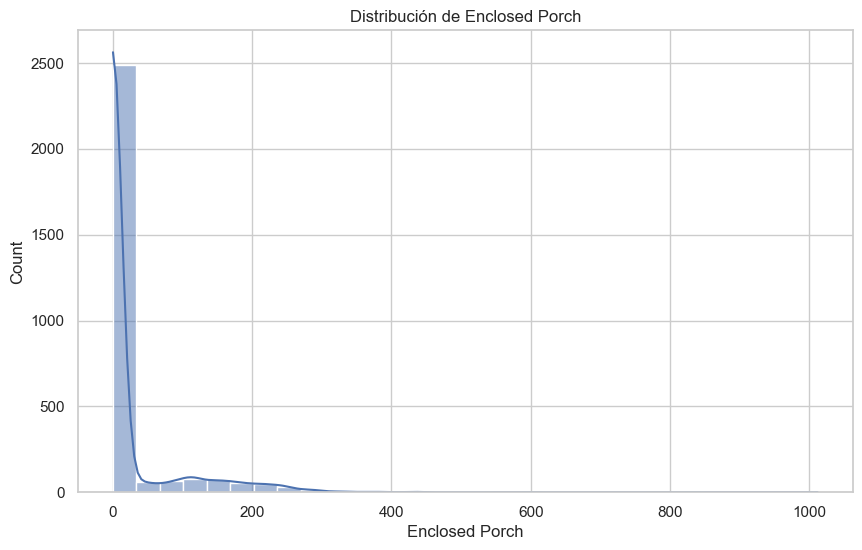

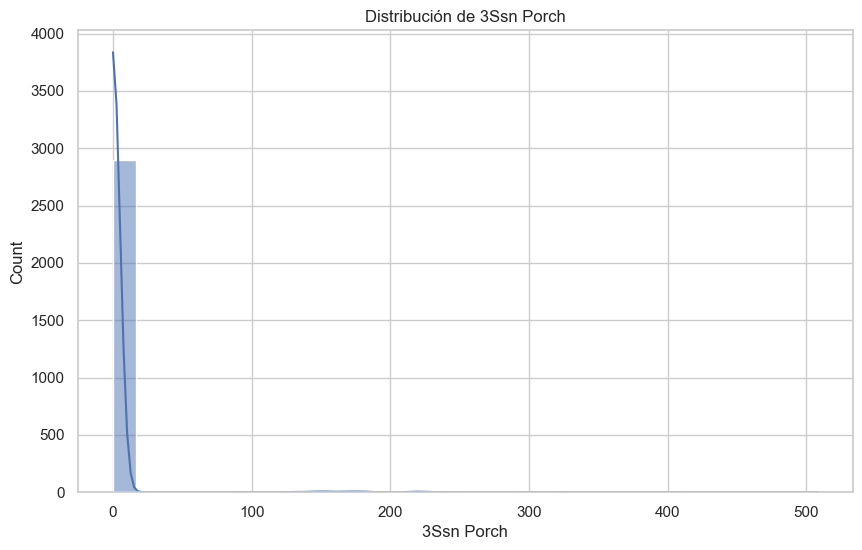

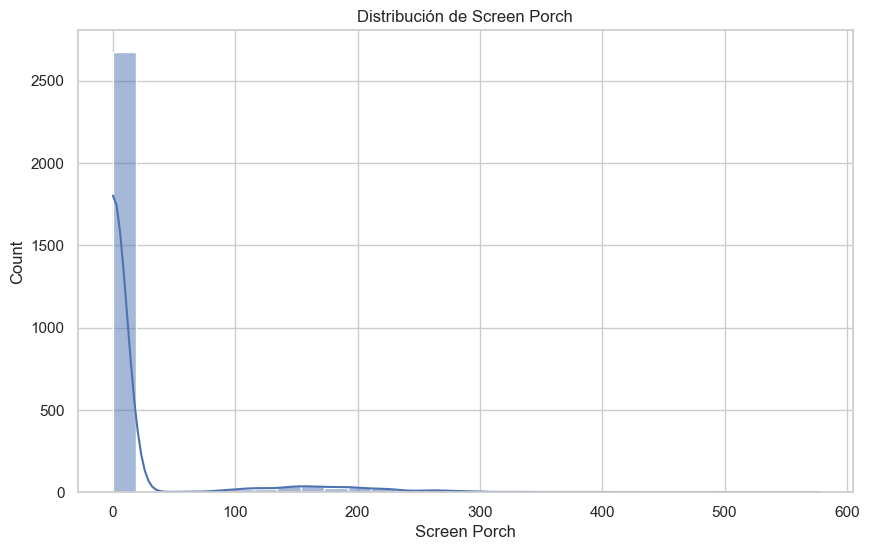

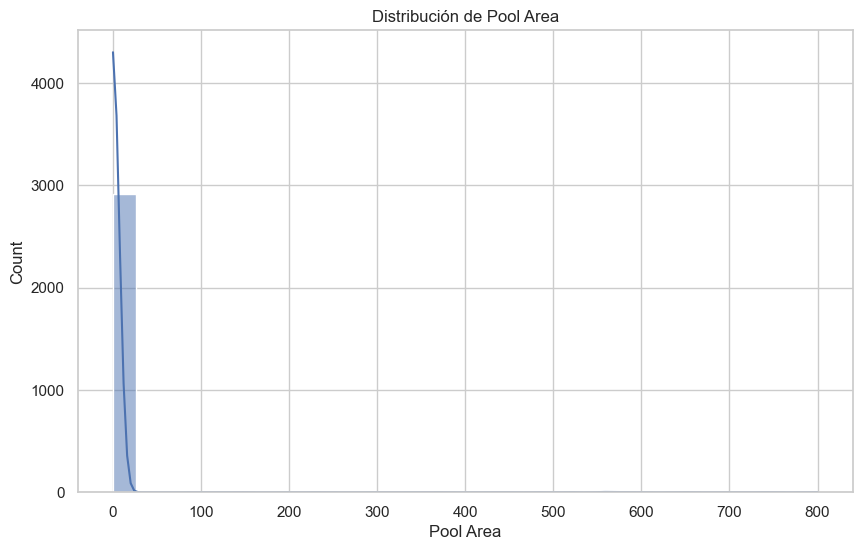

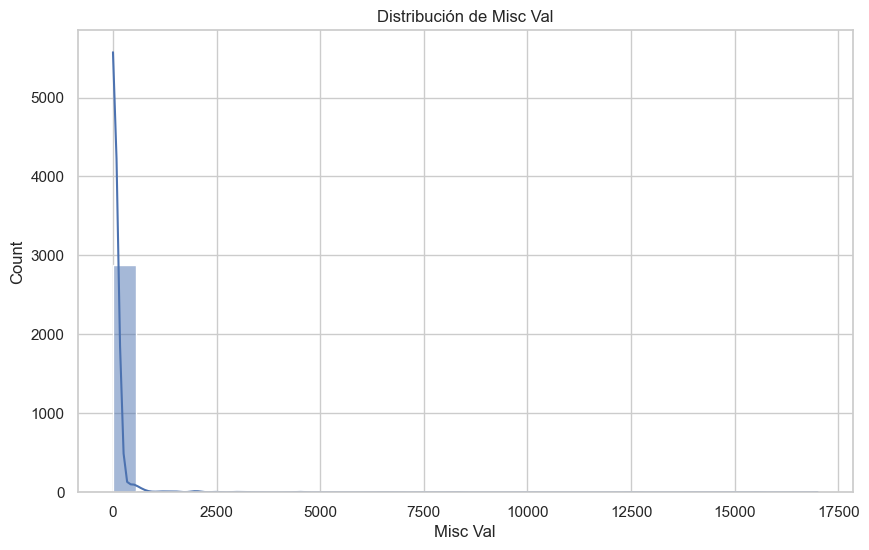

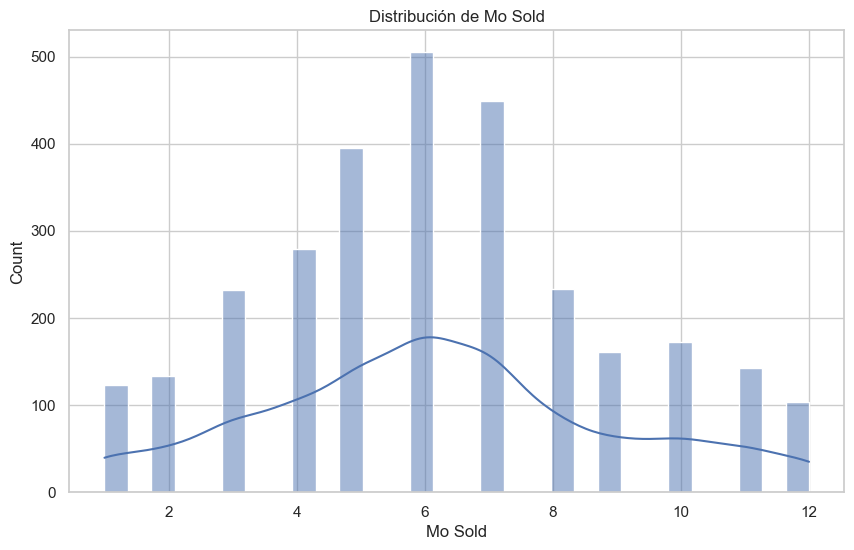

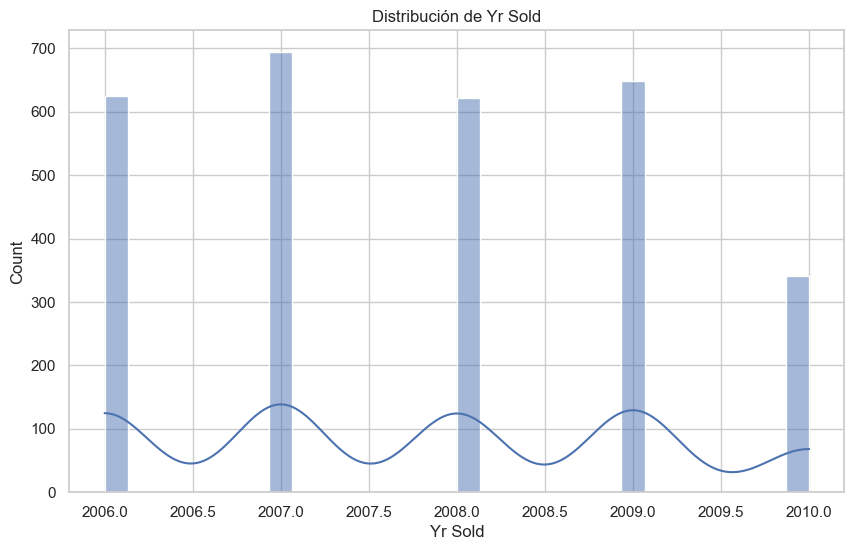

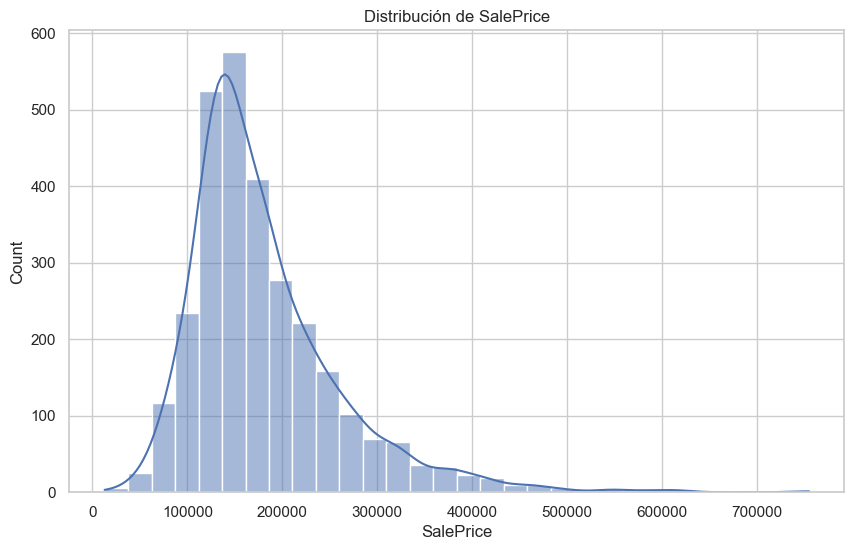

In [6]:
# ----------------------------------
# 3. Distribución variables numéricas
# ----------------------------------

num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

A primera vista podemos ver que la columna objetivo se encuentra sesgada hacia el lado derecho (también llamada sesgada positivamente). Vamos a aplicar la función para corroborar.

In [7]:
df['SalePrice'].skew()

np.float64(1.7435000757376466)

Efectivamente esta sesgada positivamente, vamos a "comprimir" ese sesgo positivo

In [8]:
df['SalePrice'] = np.log1p(df['SalePrice'])
print('Sesgo comprimido:', df['SalePrice'].skew())

Sesgo comprimido: -0.014772659537224368


In [9]:
# -----------------------------------------
# 5. Variables categóricas: conteos y % 
# -----------------------------------------

cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cols:
    print(f"\n----- Conteo de categorías en {col} -----")
    print(df[col].value_counts())
    print("\nPorcentaje:")
    print(df[col].value_counts(normalize=True)*100)


----- Conteo de categorías en MS Zoning -----
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

Porcentaje:
MS Zoning
RL         77.576792
RM         15.767918
FV          4.744027
RH          0.921502
C (all)     0.853242
I (all)     0.068259
A (agr)     0.068259
Name: proportion, dtype: float64

----- Conteo de categorías en Street -----
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Porcentaje:
Street
Pave    99.590444
Grvl     0.409556
Name: proportion, dtype: float64

----- Conteo de categorías en Alley -----
Alley
Grvl    120
Pave     78
Name: count, dtype: int64

Porcentaje:
Alley
Grvl    60.606061
Pave    39.393939
Name: proportion, dtype: float64

----- Conteo de categorías en Lot Shape -----
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64

Porcentaje:
Lot Shape
Reg    63.447099
IR1    33.412969
IR2     2.593857
IR3     0.546075
N

 <span style="color: #B0FBC3;"> Como podemos ver, tenemos muchisimas columnas que pueden aportar valor a nuestro modelo, pero lamentablemente vamos a tener que excluir la gran mayoría para trabajar con los modelos correctamente. Por eso, vamos aplicar una técnica llamada "SelectKBest" el cual nos ayuda a quedarnos con las mas importantes en base a la vairable objetivo(que queremos predecir)</span>


In [10]:
# -----------------------------------------
# 6. Visualizamos columnas mas importantes 
# -----------------------------------------

X = df.drop(columns =['SalePrice'])       # Eliminamos columna objetivo
X = pd.get_dummies(X, drop_first=True)  # Pasamos a dummies variables catégoricas
X = X.fillna(0)                         # Remplazamos nulos por 0

y = df['SalePrice']                     # Variable objetivo

selector = SelectKBest(score_func=f_regression, k=5) # Seleccionamos mejores
selector.fit(X, y)  # Entrenamos

,score_func,<function f_r...0013948A42480>
,k,5


In [11]:
# Obtener las 5 mejores columnas
selected_columns = X.columns[selector.get_support()]
print("Top 5 columnas seleccionadas:\n", selected_columns)

df_top = X
df_top = df_top[selected_columns]
df_top['SalePrice'] = y  # Asignamos la variable y a la columna 'SalePrice'

Top 5 columnas seleccionadas:
 Index(['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars',
       'Garage Area'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_23600\3130910069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['SalePrice'] = y  # Asignamos la variable y a la columna 'SalePrice'


##### Significado columnas:
- Overall Qual: Calidad general de la casa, evaluada por el evaluador. Valor de 1 (muy mala) a 10 (excelente). Es una de las variables más correlacionadas con SalePrice. <br>
- Total Bsmt SF: Superficie total del sótano (basement) en pies cuadrados.<br>
- Gr Liv Area: Área habitable sobre el suelo (Ground Living Area), en pies cuadrados. No incluye sótano. Muy correlacionada con el precio.<br>
- Garage Cars: Capacidad de la cochera en cantidad de autos.<br>
- Garage Area: Área de la cochera.<br>
- SalePrice: Precio final de venta de la casa. Es la variable objetivo (target) para predecir.<br>

<Axes: >

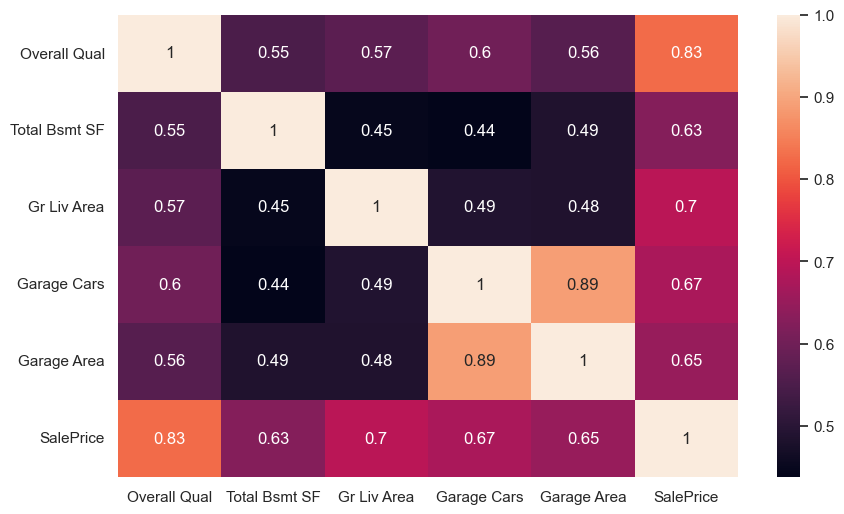

In [12]:
# Visualizamos correlación con variable objetivo
corr = df_top.corr()

# Heatmap
sns.heatmap(corr, annot=True, cbar=True)

Features mas importantes: <br>
1.'Overall Qual'<br>
2.'Total Bsmt SF'<br>
3.'Gr Liv Area'<br>
4.'Garage Cars'<br>
5.'Garage Area'<br>

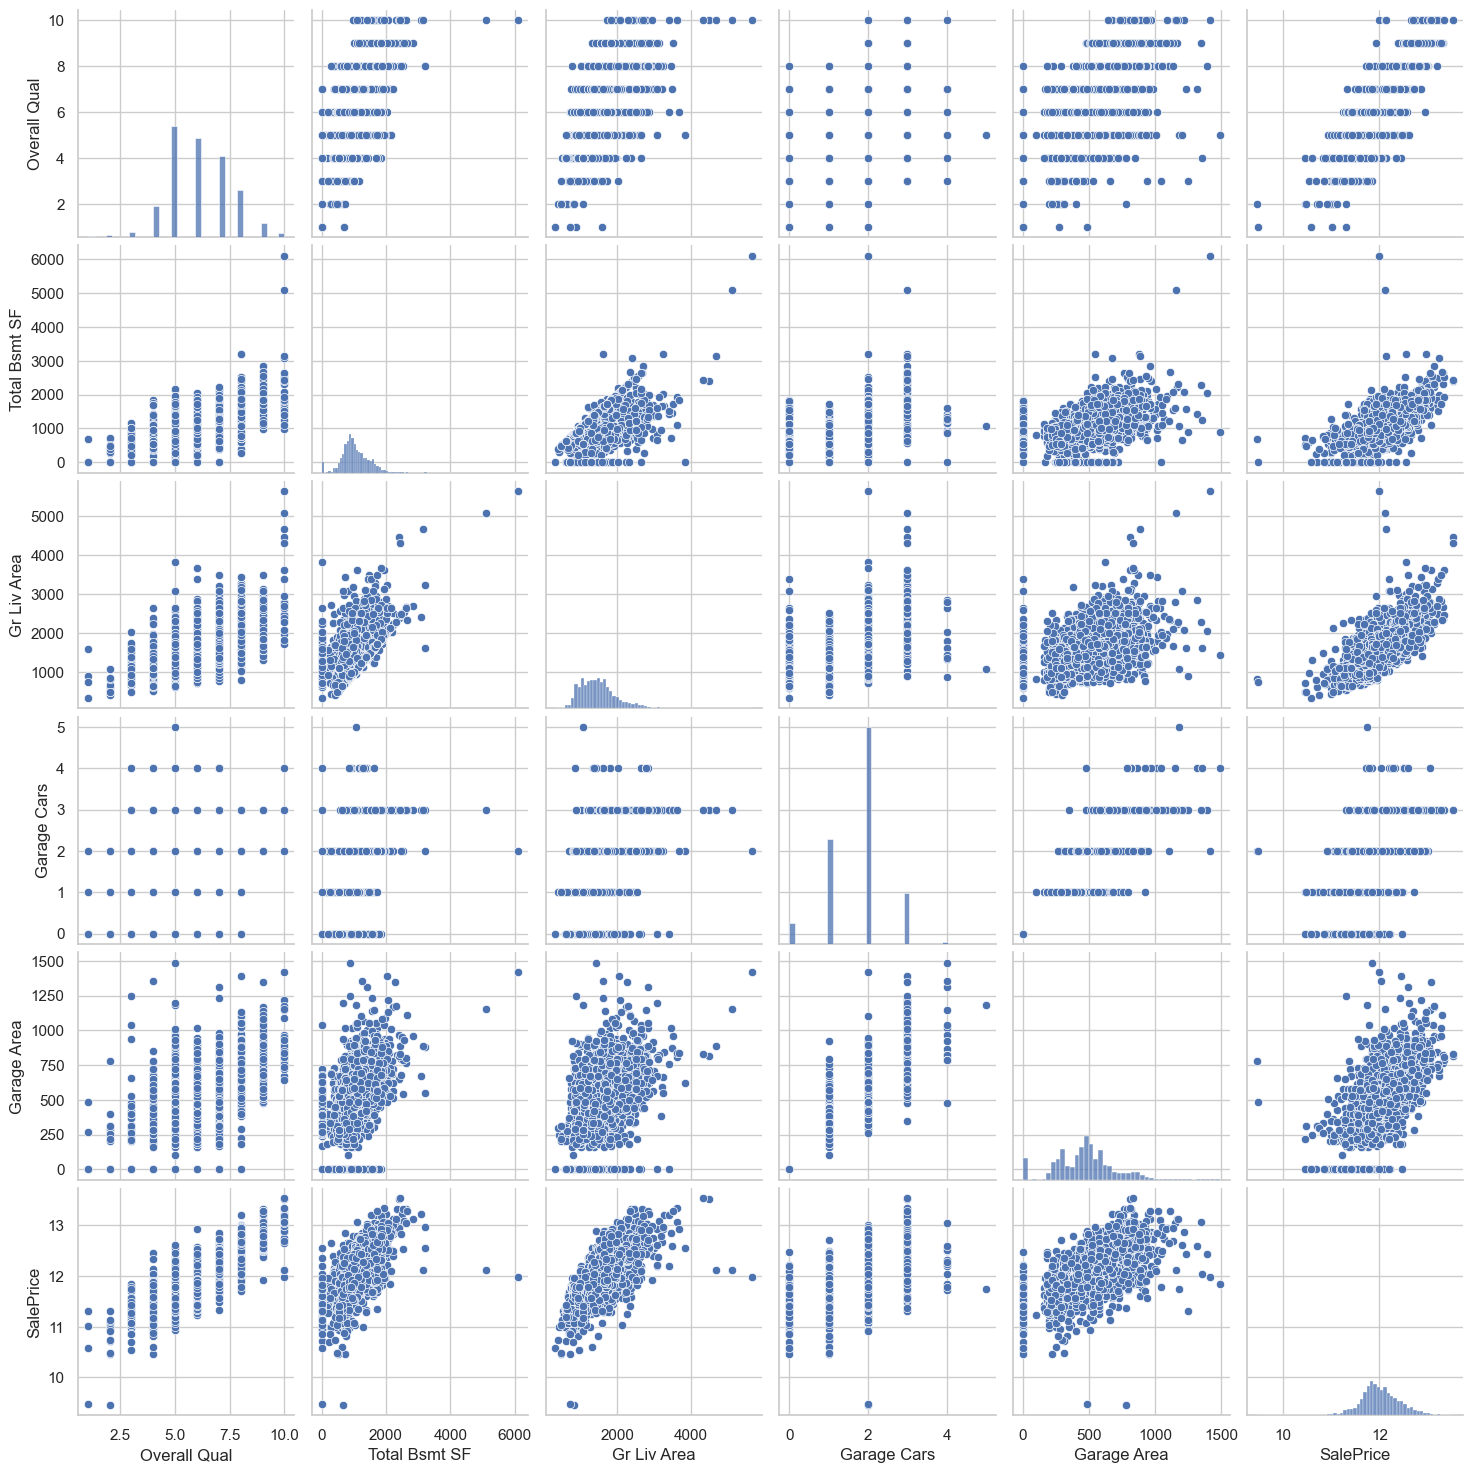

In [13]:
# Visualizamos pairplot para identificar multicolinealidad en las features
sns.pairplot(df_top)

Tenemos multicolinealidad entre la columna "Garage Cars" y "Garage Area", vamos a tener que dropear la que tiene menos correlación con "SalePrice" a la hora de realizar el preprocesamiento antes de aplicar selectKBest.

### Distribuciónes: 

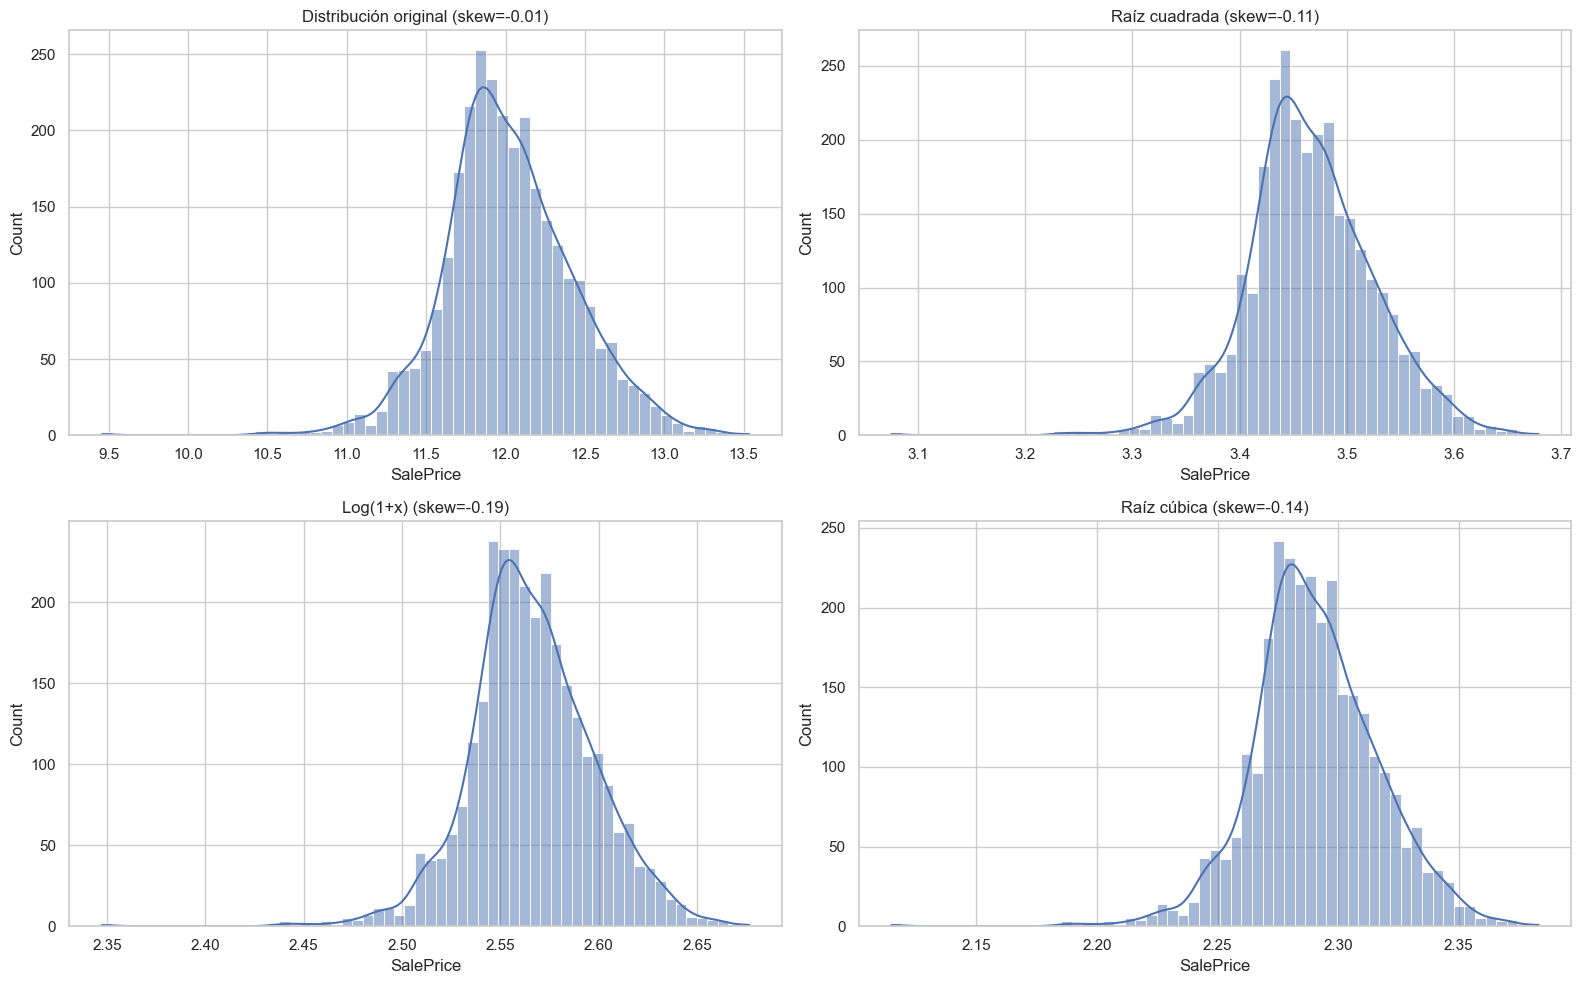

In [14]:
# Ejemplo para una columna
col = 'SalePrice'

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # 4 subplots (2x2)
axes = axes.flatten()  # para indexar como una lista de 0 a 3

# Versiones transformadas
original = df[col]
sqrt_trans = np.sqrt(df[col])
log_trans = np.log1p(df[col])
cbrt_trans = np.cbrt(df[col])

# Graficar cada una
sns.histplot(original, kde=True, ax=axes[0])
axes[0].set_title(f'Distribución original (skew={original.skew():.2f})')

sns.histplot(sqrt_trans, kde=True, ax=axes[1])
axes[1].set_title(f'Raíz cuadrada (skew={sqrt_trans.skew():.2f})')

sns.histplot(log_trans, kde=True, ax=axes[2])
axes[2].set_title(f'Log(1+x) (skew={log_trans.skew():.2f})')

sns.histplot(cbrt_trans, kde=True, ax=axes[3])
axes[3].set_title(f'Raíz cúbica (skew={cbrt_trans.skew():.2f})')

plt.tight_layout()
plt.show()

#### Después de realizar el analisis, pudimos interpretar que tenemos varias columnas las cuales tenemos que tansformar para mejorar su distribución.
Total Bsmt SF: sqrt <br>
1st Flr SF: log1p <br>
Gr Liv Area: log1p <br>
SalePrice: log1p 